# Analisis numérico - TP N1
## Búsqueda de raíces

<hr>

### Curso:
    Sassano
### Integrantes:       
<table>
    <tr>
        <th>Apellido y nombre</th>
        <th>mail</th>
        <th>padrón</th>
    </tr>
    <tr>
        <td>Romero Espinoza, Alexis</td>
        <td>ajromero@fi.uba.ar</td>
        <td>103942</td>
    </tr>
    <tr>
        <td>Cabrera Rodríguez, Mateo.</td>
        <td>mcabrerar@gmail.com</td>
        <td>108118</td>
    </tr>
</table>

### Lenguaje elegido: 
    Python

<hr>

### Corrector:

### Nota:
    

In [2]:
#Importamos las librerías a usar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random
import math
from scipy import optimize

# 1. Fuerza Bruta
Vamos a descubrir la contraseña de un candado 
<ol type="a">
    <li> Definir un número entero de 3 dígitos al azar a tráves de la función random, simulando la
    clave de un candado.</li>
    <li> Programar un algoritmo de fuerza bruta para hallar la clave.</li>
    <li> Realizar el experimento al menos 100000 veces, anotando la cantidad de intentos realizados
    hasta hallar la respuesta.</li>
    <li> Realizar un histograma para gráficar los intentos. Las columnas del histograma serán separadas en 0-10, 10-20, 20-30, etc...</li>
    <li> ¿Sirve como método de búsqueda de raíces?</li>
    <li> ¿Bajo que condiciones lo utilizaría?</li>
    <li> ¿Sería correcto hablar de convergencia?</li>
</ol>

## a. Se define una clave de 3 dígitos al azar

In [3]:
def nueva_clave():
    clave = random.randint(0,999)
    clave = str(clave).zfill(3)
    return clave

print("Por ejemplo, una clave al azar es: ", nueva_clave())

Por ejemplo, una clave al azar es:  201


## b. Programamos un algorimo de fuerza bruta para encontrar la clave


In [4]:
def fuerza_bruta(clave):
    for i in range(1000):
        if clave == str(i).zfill(3):
            return i

## c. Generamos una clave al azar y usamos fuerza bruta para encontrarla 1000000 veces, anotando la cantidad de intentos por cada búsqueda

In [5]:
ITERACIONES = 1000000
intentos = []
for i in range(ITERACIONES):
    clave = nueva_clave()
    n = fuerza_bruta(clave)

    intentos.append(n)

## d. Realizamos un histograma para mostrar la frecuencia de intentos.


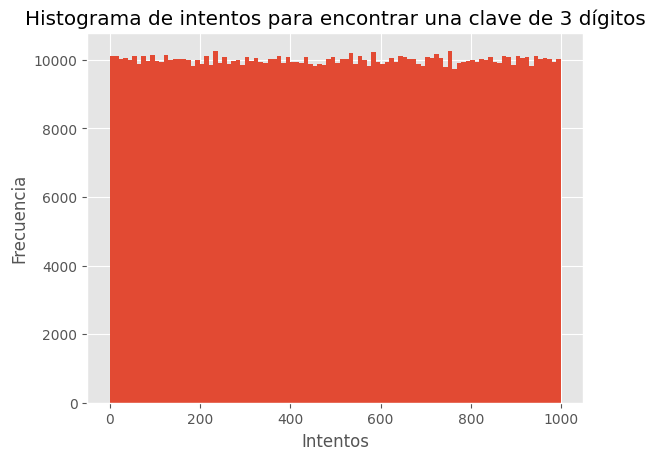

In [6]:
plt.hist(intentos, bins=100)
plt.xlabel("Intentos")
plt.ylabel("Frecuencia")
plt.title("Histograma de intentos para encontrar una clave de 3 dígitos")
plt.show()

Con el gráfico podemos observar que este algoritmo tarda en obtener la clave menos de 10 intentos o más de 900 en aproximadamente la mísma cantidad de casos. No tenemos control ni conocimiento de cuanto va a tardar, más allá de saber que tomará entre 1 y 1000 intentos uniformemente.

## 🤔
¿Podría ser esto causa de una mala elección de numeros que probar al hacer fuerza bruta? Vamos a pobar elegir número en un orden distinto para ver otros resultados y compararlos.

In [7]:
# definimos un segundo algoritmo de fuerza bruta que busque en otro orden
def fuerza_bruta2(clave):
    for i in range(1000):
        if clave == str(i if i%2==0 else 1000-i).zfill(3):
            return i

In [8]:
intentos_otro_orden = []
for i in range(ITERACIONES):
    clave = nueva_clave()
    n = fuerza_bruta2(clave)

    intentos_otro_orden.append(n)

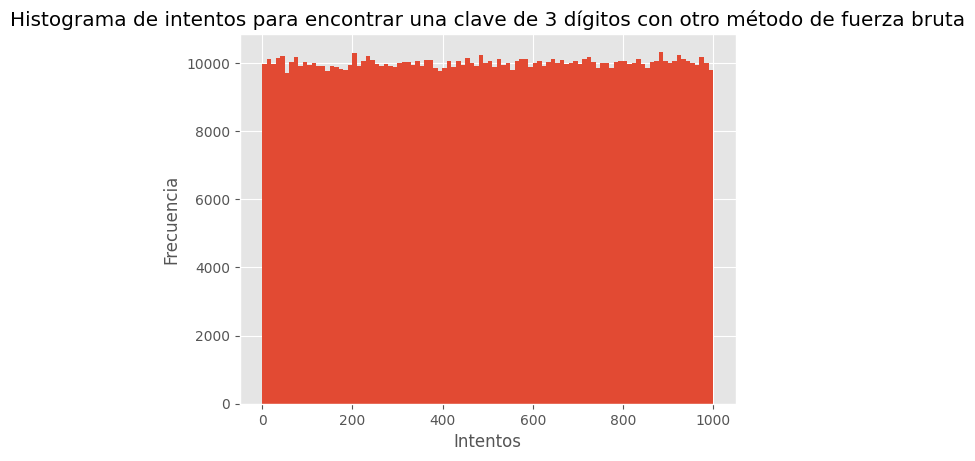

In [9]:
plt.hist(intentos_otro_orden, bins=100)
plt.xlabel("Intentos")
plt.ylabel("Frecuencia")
plt.title("Histograma de intentos para encontrar una clave de 3 dígitos con otro método de fuerza bruta")
plt.show()

Como podemos ver en el segundo gráfico, obtuvimos resultados muy similares. Lo que tarde el algoritmo de fuerza bruta, no dependerá del orden en el que probemos todas las posibilidades.

## e. ¿Sirve como método de búsqueda de raíces?

El método de búsqueda de fuerza bruta no es un método eficiente para la búsqueda de raíces de una función, ya que puede ser muy costoso, es decir requiere demasiado esfuerzo y tiempo, especialmente cuando el espacio de búsqueda es grande. Este método, no utiliza ningún tipo de información acerca de la función para acelerar la búsqueda, como sería ideal que se haga en caso de tenerlos disponibles.

## f. ¿Bajo que condiciones lo utilizaría?

El método de búsqueda de fuerza bruta puede ser útil en casos donde no tengo ningún tipo de información disponible sobre mi función que pueda aprovechar para acelerar la búsqueda. El ejemplo del ejercicio, la búsqueda de una clave, la podémos imaginar como una función simple, que vale 1 en cualquier número del dominio excepto en la clave, donde vale 0. Esta función no tiene información explotable, por lo que la única manera de asegurar encontrar la raíz, es probar todos los casos posibles.

En caso de contar con información extra, lo ideal sería utilizar métodos de búsqueda que convergan más rápido, como bisección o Newton-Raphson.

## g. ¿Sería correcto hablar de convergencia?

No es correcto hablar de convergencia cuando se habla de fuerza bruta. El algoritmo no se acerca gradualmente a la solución a medida que se realizan más intentos, sino que prueba todas las posibles soluciones en un orden arbitrario. No conoce cuando está cerca o lejos de la solución.

# 2. Hallar π por dos caminos
<ol type="a">
    <li> Programar un algoritmo para aproximar π utilizando la función seno(x) con el método de Newton-Raphson, en función de x, que realice iteraciones hasta alcanzar el límite de la herramienta utilizada.</li>
    <li> Programar un algoritmo para aproximar π utilizando la serie de Leibniz, en función de n.</li>
    <li> Ejecutar los programas solicitados en a y b utilizando representación de punto flotante de 32 bits y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000.</li>
    <li> Ejecutar los programas solicitados en a y b utilizando representación de punto flotante de 64 bits y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000.</li>
    <li> (OPCIONAL) Ejecutar los programas solicitados en a y b con una calculadora (aclarar marca y modelo) y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000 (en caso de no alcanzar la memoria de la calculadora utilizar el máximo n posible).</li>
    <li> Representar las dos respuestas finales obtenidas (para n = 100000 y el método de Newton Raphson) en c, d y e de manera de expresarlo como π = ¯π + ∆π.</li>
    <li> ¿Podemos afirmar qué para la computadora el número π es una constante?</li>
</ol>

## a. Programar un algoritmo para aproximar π utilizando la función seno(x) con el método de Newton-Raphson, en función de x, que realice iteraciones hasta alcanzar el límite de la herramienta utilizada.

In [10]:
def f(x):
    return math.sin(x)
def df(x):
    return math.cos(x)

def newton_raphson(x0, f, df, tol=1e-15):
    p = x0
    while abs(f(p)) > tol:
        p = p - f(p)/df(p)
    return p

## b. Programar un algoritmo para aproximar π utilizando la serie de Leibniz, en función de n.

La serie de Leibniz se puede expresar como <br>
$$
\sum_{n=0}^\infty \frac{(-1)^n}{2n+1} = 1-\frac13+\frac15-\frac17+\frac19-\frac{11}{13}+\cdots = \frac{\pi}{4}
$$
Esta suma infinita, converge a π/4, por lo que podemos iterar la seria cuanto sea necesario y multiplicar el resultado obtenido por 4 para calcular π.

In [11]:
def leibniz(n):
    suma = 0
    for i in range(n):
        suma += (-1)**i/(2*i+1)
    return 4*suma

## c. Ejecutar los programas solicitados en a y b utilizando representación de punto flotante de 32 bits y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000.



In [12]:
# Newton-Raphson con 32 bits
pi_nw = newton_raphson(3, f, df, tol=1e-7)
print("Newton-Raphson con 32 bits: ", pi_nw)
print("Error: ", abs(pi_nw - np.pi), '\n')

# Leibniz con con n = 10, n = 100, n = 1000, n = 10000 y n = 100000
for n in [10, 100, 1000, 10000, 100000]:
    pi_lb = leibniz(n)
    print("Leibniz con n = ", n, ": ", pi_lb)
    print("Error: ", abs(pi_lb - np.pi), '\n')

Newton-Raphson con 32 bits:  3.141592653300477
Error:  2.893161266115385e-10 

Leibniz con n =  10 :  3.0418396189294032
Error:  0.09975303466038987 

Leibniz con n =  100 :  3.1315929035585537
Error:  0.00999975003123943 

Leibniz con n =  1000 :  3.140592653839794
Error:  0.000999999749998981 

Leibniz con n =  10000 :  3.1414926535900345
Error:  9.99999997586265e-05 

Leibniz con n =  100000 :  3.1415826535897198
Error:  1.0000000073340232e-05 



## d. Ejecutar los programas solicitados en a y b utilizando representación de punto flotante de 64 bits y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000.



In [13]:
# Newton-Raphson con 64 bits
pi_nw = newton_raphson(3, f, df)
print("Newton-Raphson con 64 bits: ", pi_nw)
print("Error: ", abs(pi_nw - np.pi))

# Leibniz con con n = 10, n = 100, n = 1000, n = 10000 y n = 100000
for n in [10, 100, 1000, 10000, 100000]:
    pi_lb = leibniz(n)
    print("Leibniz con n = ", n, ": ", pi_lb)
    print("Error: ", abs(pi_lb - np.pi), '\n')

Newton-Raphson con 64 bits:  3.141592653589793
Error:  0.0
Leibniz con n =  10 :  3.0418396189294032
Error:  0.09975303466038987 

Leibniz con n =  100 :  3.1315929035585537
Error:  0.00999975003123943 

Leibniz con n =  1000 :  3.140592653839794
Error:  0.000999999749998981 

Leibniz con n =  10000 :  3.1414926535900345
Error:  9.99999997586265e-05 

Leibniz con n =  100000 :  3.1415826535897198
Error:  1.0000000073340232e-05 



## f. Representar las dos respuestas finales obtenidas (para n = 100000 y el método de Newton Raphson) en c, d y e de manera de expresarlo como π = ¯π + ∆π.

Valor obtenido con la serie de Leibniz, con 100000 iteraciones:<br>
$V_0 = 3.14158 \pm 2 \times 10^{-5}$ 

Valor obtenido para Newton-Raphson con un float de 32 bits:<br>
$V_0 = 3.141592 \pm  1 \times 10^{-6}$

Valor obtenido para Newton-Raphson con un float de 64 bits:<br>
$V_0 = 3.141592653589793 \pm 1 \times 10^{-15} $

## g. ¿Podemos afirmar qué para la computadora el número π es una constante?

Si bien sabemos que π es una constante matemática bien definida, su representación en una computadora está sujeta a cierta imprecisión, ya que está limitada por su arquitectura y va a sufrir cierto error de redondeo debido a la precisión del sistema de punto flotante utilizado para almacenar números. <br>
Por lo tanto, el valor numérico de π en una computadora se aproxima a una constante, pero no es exactamente igual a ella.

# 3. Búsqueda de raíces
Para las siguientes funciones continuas y con raíz única en el intervalo [0, 3]:

$f_1(x) = x^3 - 19$

$f_2(x) = x^5 - 7.3x^4 + 2.24x^3 + 30.106x^2 - 42.1x + 15.94$

$f_3(x) = (x - 0.9)e^{-4(x-0.9)^2}$

se pide:
<ol type="a">
    <li> Graficar las funciones en el intervalo de interés.</li>
    <li> Halle para cada una de ellas la raíz en el intervalo indicado mediante los métodos vistos en clase:
        <ul>
            <li> Bisección</li>
            <li> Punto Fijo</li>
            <li> Secante</li>
            <li> Newton-Raphson</li>
            <li> Newton-Raphson modificado</li>
        </ul>
        Use para todos los métodos como criterio de parada las siguientes diferencia entre dos iteraciones sucesivas:
        <ul>
            <li>1 · 10<sup>-5</sup></li>
            <li>1 · 10<sup>-13</sup></li>
        </ul>
        Para Newton-Raphson use semilla x<sub>0</sub> = 0.5.
        Mostrar en una tabla por cada método los resultados obtenidos (en caso que se obtengan muchas iteraciones se pueden mostrar las primeras 5 y las últimas 5).</li>
    <li> Halle la raíz mediante la función de búsqueda de raíces de un lenguaje o paquete orientado a cálculo numérico (e.g. Python+SciPy: scipy.optimize.brentq). Al resultado obtenido le vamos a asignar como "xReal".</li>
    <li> Compare los resultados obtenidos para los distintos métodos y cotas de error, grafique para todos los casos:
        <ul>
            <li>Orden de convergencia P vs iteraciones</li>
            <li>Constante asintótica λ vs iteraciones</li>
            <li>log<sub>10</sub>(/∆x/) vs iteraciones</li>
            <li>log<sub>10</sub>(/x<sub>Candidata</sub> - x<sub>Real</sub>/) vs iteraciones</li>
        </ul>
        Discuta ventajas y desventajas. ¿Son las que esperaba en base a la teoría?</li>
</ol>

In [14]:
# Definimos las funciones con las que vamos a trabajar

def f_1(x):
    return x**3 - 19

def f_2(x):
    return x**5 - 7.3*x**4 + 2.24*x**3 + 30.106*x**2 - 42.1*x + 15.94

def f_3(x):
    return (x - 0.9) * math.e**(-4*(x-0.9)**2)

## a. Graficar las funciones en el intervalo [0, 3]

### f_1(x)

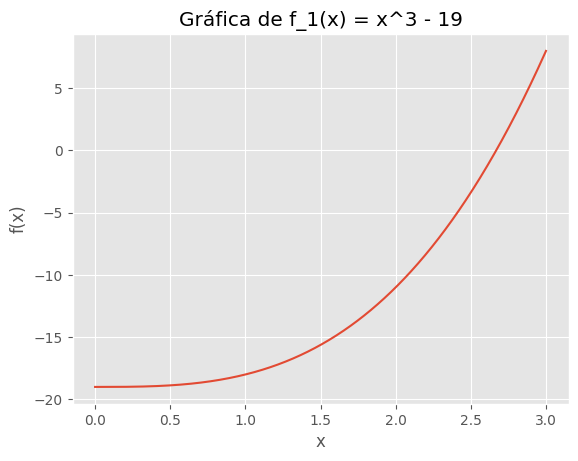

In [15]:
x = np.linspace(0, 3, 1000)
y = f_1(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de f_1(x) = x^3 - 19")
plt.show()

### f_2(x)

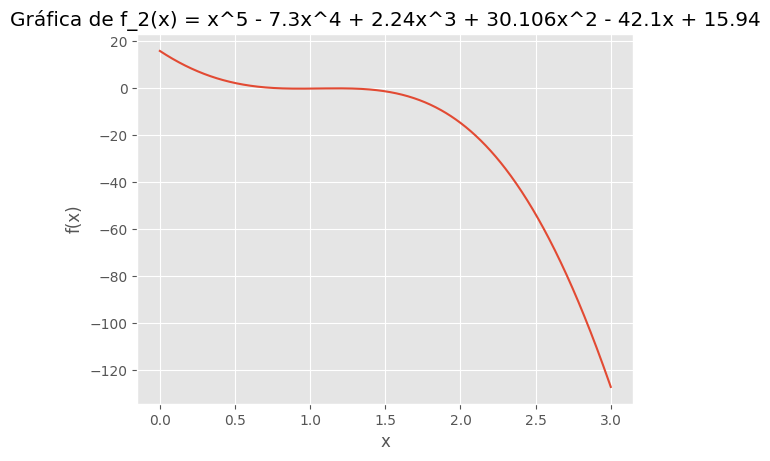

In [16]:
y = f_2(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de f_2(x) = x^5 - 7.3x^4 + 2.24x^3 + 30.106x^2 - 42.1x + 15.94")
plt.show()

Graficamos en un intervalo más pequeño para ver bien la raíz.

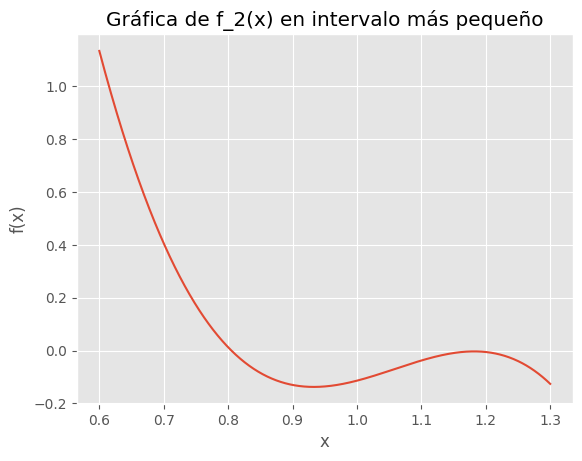

In [17]:
x_ = np.linspace(0.6, 1.3, 1000)
y = f_2(x_)
plt.plot(x_, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de f_2(x) en intervalo más pequeño")
plt.show()

### f_3(x)

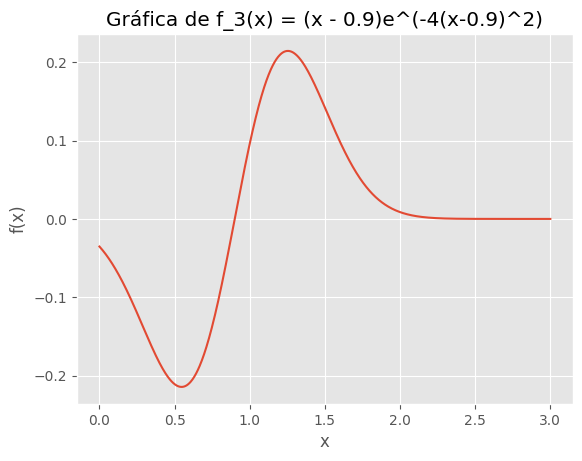

In [18]:
y = f_3(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de f_3(x) = (x - 0.9)e^(-4(x-0.9)^2)")
plt.show()

## b. Halle para cada una de ellas la raíz en el intervalo indicado mediante los métodos vistos en clase

### Defino los métodos de busqueda de raíces

In [19]:
# Defino una cantidad de iteraciones máxima para que no se quede en un bucle infinito
MAX_ITER = 1000

def biseccion(f, a, b, tol, mostrar_resultados=False):
    resultados = []
    resultados.append(a)
    resultados.append(a+b/2)
    for _ in range(MAX_ITER):
        if abs(resultados[-1] - resultados[-2]) < tol:
            break;
        if f(resultados[-1])*f(a) < 0:
            b = resultados[-1]
        else:
            a = resultados[-1]
        resultados.append((a + b)/2)
    if mostrar_resultados:
        print("Resultados de la bisección:")
        df = pd.DataFrame(resultados, columns=['p'])
        print("Primeras 5 iteraciones:")
        display(df.head(5))
        print("Últimas 5 iteraciones:")
        display(df.tail(5))
    return resultados

def punto_fijo(g, x0, tol, mostrar_resultados=False):
    resultados = []
    resultados.append(x0)
    resultados.append(g(x0))
    for _ in range(MAX_ITER):
        if abs(resultados[-1] - resultados[-2]) < tol:
            break;
        resultados.append(g(resultados[-1]))
    if mostrar_resultados:
        print("Resultados del punto fijo:")
        df = pd.DataFrame(resultados, columns=['p'])
        print("Primeras 5 iteraciones:")
        display(df.head(5))
        print("Últimas 5 iteraciones:")
        display(df.tail(5))
    return resultados

def secante(f, x0, x1, tol, mostrar_resultados=False):
    resultados = []
    resultados.append(x0)
    resultados.append(x1)
    for _ in range(MAX_ITER):
        if abs(resultados[-1] - resultados[-2]) < tol:
            break;
        div = f(resultados[-1]) - f(resultados[-2])
        if div == 0: break
        x2 = resultados[-1] - f(resultados[-1]) * (resultados[-1] - resultados[-2]) / div
        resultados.append(x2)
    if mostrar_resultados:
        print("Resultados de la secante:")
        df = pd.DataFrame(resultados, columns=['p'])
        print("Primeras 5 iteraciones:")
        display(df.head(5))
        print("Últimas 5 iteraciones:")
        display(df.tail(5))
    return resultados

def newton_raphson(f, df, x0, tol, mostrar_resultados=False):
    resultados = []
    resultados.append(x0)
    resultados.append(x0 - f(x0)/df(x0))
    for _ in range(MAX_ITER):
        if abs(resultados[-1] - resultados[-2]) < tol:
            break;
        resultados.append(resultados[-1] - f(resultados[-1])/df(resultados[-1]))
    if mostrar_resultados:
        print("Resultados de Newton-Raphson:")
        df = pd.DataFrame(resultados, columns=['p'])
        print("Primeras 5 iteraciones:")
        display(df.head(5))
        print("Últimas 5 iteraciones:")
        display(df.tail(5))
    return resultados

def newton_raphson_modificado(f, df, df_2, x0, tol, mostrar_resultados=False):
    resultados = []
    resultados.append(x0)
    resultados.append(x0 - (f(x0)*df(x0)) / (df(x0)**2 - f(x0)*df_2(x0)))
    for _ in range(MAX_ITER):
        if abs(resultados[-1] - resultados[-2]) < tol:
            break;
        resultados.append(resultados[-1] - (f(resultados[-1])*df(resultados[-1])) / (df(resultados[-1])**2 - f(resultados[-1])*df_2(resultados[-1])))
    if mostrar_resultados:
        print("Resultados de Newton-Raphson modificado:")
        df = pd.DataFrame(resultados, columns=['p'])
        print("Primeras 5 iteraciones:")
        display(df.head(5))
        print("Últimas 5 iteraciones:")
        display(df.tail(5))
    return resultados


Use para todos los métodos como criterio de parada las siguientes diferencia entre dos iteraciones sucesivas:
        <ul>
            <li>1 · 10<sup>-5</sup></li>
            <li>1 · 10<sup>-13</sup></li>
        </ul>
        Para Newton-Raphson use semilla x<sub>0</sub> = 0.5.
        Mostrar en una tabla por cada método los resultados obtenidos (en caso que se obtengan muchas iteraciones se pueden mostrar las primeras 5 y las últimas 5).

### Busqueda de Raices f_1

#### Con tolerancia 1 · 10<sup>-5</sup>.

In [20]:
tol = 1e-5
a = 0
b = 3

print("Tolerancia: ", tol)
print("f_1(x) = x^3 - 19")
print("Intervalo: [0, 3]")

Tolerancia:  1e-05
f_1(x) = x^3 - 19
Intervalo: [0, 3]


##### Bisección

In [21]:
resultados = biseccion(f_1, a, b, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados de la bisección:
Primeras 5 iteraciones:


,p
0,0.0000
1,1.5000
2,2.2500
3,2.6250
4,2.8125


Últimas 5 iteraciones:


,p
15,2.668488
16,2.668442
17,2.668419
18,2.668407
19,2.668402


Raíz obtenida:  2.6684


##### Punto Fijo

Para encontrar $g(x)$, planteamos $g(x) = x + C.f(x)$ con C siendo una constante.

Para comprobar que sea admisible, es decir: <br>
    $g(x) \in [a,b] \forall x \in [a,b]$ y<br>
    $|g'(x)| \leq k < 1 \forall x \in [a,b]$.<br>
Vamos a realizar un gráfico.


Punto fijo
Calculo g admisible:


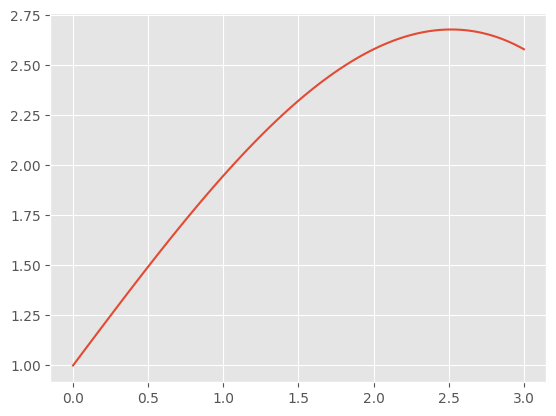

In [22]:
print("\nPunto fijo\nCalculo g admisible:")
def g_1(x):
    return x - 1/19 * f_1(x)
# Compruebo que g(x) es admisible con un gráfico
x = np.linspace(a, b, 100)
y = [g_1(i) for i in x]
plt.plot(x, y)
plt.show()

In [23]:
resultados = punto_fijo(g_1, a, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados del punto fijo:
Primeras 5 iteraciones:


,p
0,0.000000
1,1.000000
2,1.947368
3,2.558690
4,2.677034


Últimas 5 iteraciones:


,p
5,2.667298
6,2.668538
7,2.668385
8,2.668404
9,2.668401


Raíz obtenida:  2.6684


##### Secante

In [24]:
resultados = secante(f_1, a, b, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados de la secante:
Primeras 5 iteraciones:


,p
0,0.000000
1,3.000000
2,2.111111
3,2.595758
4,2.686308


Últimas 5 iteraciones:


,p
3,2.595758
4,2.686308
5,2.667907
6,2.668398
7,2.668402


Raíz obtenida:  2.6684


##### Newton-Raphson

In [25]:
p_0 = 0.5

def df_1(x):
    return 3*x**2

In [26]:
resultados = newton_raphson(f_1, df_1, p_0, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados de Newton-Raphson:
Primeras 5 iteraciones:


,p
0,0.500000
1,25.666667
2,17.120725
3,11.435423
4,7.672047


Últimas 5 iteraciones:


,p
7,2.935042
8,2.691892
9,2.668606
10,2.668402
11,2.668402


Raíz obtenida:  2.6684


##### Newton-Raphson Modificado

In [27]:
# Calculo la segunda derivada de f_1
def d2f_1(x):
    return 6*x

In [28]:
resultados = newton_raphson_modificado(f_1, df_1, d2f_1, p_0, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados de Newton-Raphson modificado:
Primeras 5 iteraciones:


,p
0,0.500000
1,0.747541
2,1.109119
3,1.606015
4,2.172228


Últimas 5 iteraciones:


,p
4,2.172228
5,2.566165
6,2.664387
7,2.668396
8,2.668402


Raíz obtenida:  2.6684


#### Con toleracia 1 · 10<sup>-13</sup>

In [29]:
tol = 1e-13

##### Biseccion

In [30]:
resultados = biseccion(f_1, a, b, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de la bisección:
Primeras 5 iteraciones:


,p
0,0.0000
1,1.5000
2,2.2500
3,2.6250
4,2.8125


Últimas 5 iteraciones:


,p
41,2.668402
42,2.668402
43,2.668402
44,2.668402
45,2.668402


Raíz obtenida:  2.668401648721982


##### Punto Fijo

In [31]:
resultados = punto_fijo(g_1, a, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados del punto fijo:
Primeras 5 iteraciones:


,p
0,0.000000
1,1.000000
2,1.947368
3,2.558690
4,2.677034


Últimas 5 iteraciones:


,p
14,2.668402
15,2.668402
16,2.668402
17,2.668402
18,2.668402


Raíz obtenida:  2.6684016487219466


##### Secante

In [32]:
resultados = secante(f_1, a, b, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de la secante:
Primeras 5 iteraciones:


,p
0,0.000000
1,3.000000
2,2.111111
3,2.595758
4,2.686308


Últimas 5 iteraciones:


,p
5,2.667907
6,2.668398
7,2.668402
8,2.668402
9,2.668402


Raíz obtenida:  2.668401648721945


##### Newton-Raphson

In [33]:
resultados = newton_raphson(f_1, df_1, p_0, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de Newton-Raphson:
Primeras 5 iteraciones:


,p
0,0.500000
1,25.666667
2,17.120725
3,11.435423
4,7.672047


Últimas 5 iteraciones:


,p
8,2.691892
9,2.668606
10,2.668402
11,2.668402
12,2.668402


Raíz obtenida:  2.668401648721945


##### Newton-Raphson Modificado

In [34]:
resultados = newton_raphson_modificado(f_1, df_1, d2f_1, p_0, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de Newton-Raphson modificado:
Primeras 5 iteraciones:


,p
0,0.500000
1,0.747541
2,1.109119
3,1.606015
4,2.172228


Últimas 5 iteraciones:


,p
6,2.664387
7,2.668396
8,2.668402
9,2.668402
10,2.668402


Raíz obtenida:  2.668401648721945


### Busqueda de Raices f_2(x)

#### Con tolerancia 1 · 10<sup>-5</sup>.

In [35]:
tol = 1e-5

print("Tolerancia: ", tol)
print("f_2(x) = x^5 - 7.3*x^4 + 2.24*x^3 + 30.106*x^2 - 42.1*x + 15.94")
print("Intervalo: [0, 3]")

Tolerancia:  1e-05
f_2(x) = x^5 - 7.3*x^4 + 2.24*x^3 + 30.106*x^2 - 42.1*x + 15.94
Intervalo: [0, 3]


##### Bisección

In [36]:
resultados = biseccion(f_2, a, b, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados de la bisección:
Primeras 5 iteraciones:


,p
0,0.0000
1,1.5000
2,0.7500
3,1.1250
4,0.9375


Últimas 5 iteraciones:


,p
15,0.805023
16,0.804977
17,0.805000
18,0.804989
19,0.804983


Raíz obtenida:  0.80498


##### Punto Fijo

Para calcular $g(x)$ primero intentamos despejar $f(x)=0$. Pero nos costó encontrar una $g(x)$ admisible y cuando lo hicimos tardaba demasiado. <br>
Optamos entonces por volver a plantear $g(x) = x + C.f(x)$ siendo C una constante que asegure que $g(x)$ sea admisible.


Punto fijo
Calculo g admisible:


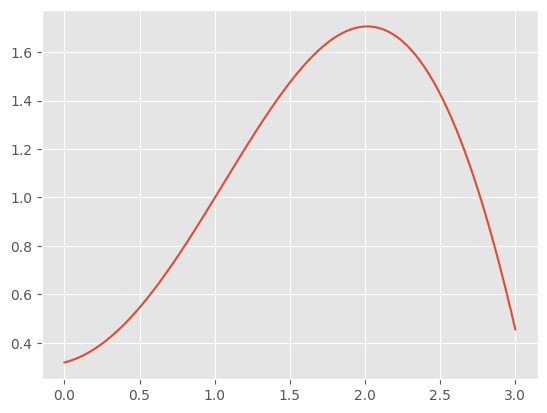

In [37]:
print("\nPunto fijo\nCalculo g admisible:")
def g_2(x):
    return x + 1/50 * f_2(x)
# Compruebo que g(x) es admisible con un gráfico
x = np.linspace(a, b, 100)
y = [g_2(i) for i in x]
plt.plot(x, y)
plt.show()

In [38]:
resultados = punto_fijo(g_2, a, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados del punto fijo:
Primeras 5 iteraciones:


,p
0,0.000000
1,0.318800
2,0.430375
3,0.497183
4,0.543386


Últimas 5 iteraciones:


,p
127,0.804757
128,0.804768
129,0.804778
130,0.804788
131,0.804798


Raíz obtenida:  0.8048


##### Secante

In [39]:
resultados = secante(f_2, a, b, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados de la secante:
Primeras 5 iteraciones:


,p
0,0.000000
1,3.000000
2,0.334018
3,0.439351
4,0.603651


Últimas 5 iteraciones:


,p
7,0.786459
8,0.801101
9,0.804649
10,0.804982
11,0.804989


Raíz obtenida:  0.80499


##### Newton-Raphson

In [40]:
p_0 = 0.5
# Calculo la derivada de f_2
def df_2(x):
    return 5*x**4 - 29.2*x**3 + 6.72*x**2 + 60.212*x - 42.1

In [41]:
resultados = newton_raphson(f_2, df_2, p_0, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados de Newton-Raphson:
Primeras 5 iteraciones:


,p
0,0.500000
1,0.666392
2,0.758027
3,0.796733
4,0.804660


Últimas 5 iteraciones:


,p
2,0.758027
3,0.796733
4,0.804660
5,0.804988
6,0.804989


Raíz obtenida:  0.80499


##### Newton-Raphson Modificado

In [42]:
# Calculo la segunda derivada de f_2
def d2f_2(x):
    return 20*x**3 - 87.6*x**2 + 13.44*x + 60.212

In [43]:
resultados = newton_raphson_modificado(f_2, df_2, d2f_2, p_0, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados de Newton-Raphson modificado:
Primeras 5 iteraciones:


,p
0,0.500000
1,0.895556
2,0.866414
3,0.830871
4,0.808922


Últimas 5 iteraciones:


,p
3,0.830871
4,0.808922
5,0.805070
6,0.804989
7,0.804989


Raíz obtenida:  0.80499


#### Con tolerancia 1 · 10<sup>-13</sup>.

In [44]:
tol = 1e-13

##### Bisección

In [45]:
resultados = biseccion(f_2, a, b, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de la bisección:
Primeras 5 iteraciones:


,p
0,0.0000
1,1.5000
2,0.7500
3,1.1250
4,0.9375


Últimas 5 iteraciones:


,p
41,0.804989
42,0.804989
43,0.804989
44,0.804989
45,0.804989


Raíz obtenida:  0.8049885393483862


##### Punto Fijo

In [46]:
resultados = punto_fijo(g_2, a, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados del punto fijo:
Primeras 5 iteraciones:


,p
0,0.000000
1,0.318800
2,0.430375
3,0.497183
4,0.543386


Últimas 5 iteraciones:


,p
500,0.804989
501,0.804989
502,0.804989
503,0.804989
504,0.804989


Raíz obtenida:  0.8049885393464679


##### Secante

In [47]:
resultados = secante(f_2, a, b, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de la secante:
Primeras 5 iteraciones:


,p
0,0.000000
1,3.000000
2,0.334018
3,0.439351
4,0.603651


Últimas 5 iteraciones:


,p
10,0.804982
11,0.804989
12,0.804989
13,0.804989
14,0.804989


Raíz obtenida:  0.804988539348394


##### Newton-Raphson

In [48]:
resultados = newton_raphson(f_2, df_2, p_0, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de Newton-Raphson:
Primeras 5 iteraciones:


,p
0,0.500000
1,0.666392
2,0.758027
3,0.796733
4,0.804660


Últimas 5 iteraciones:


,p
4,0.804660
5,0.804988
6,0.804989
7,0.804989
8,0.804989


Raíz obtenida:  0.8049885393483955


##### Newton-Raphson Modificado

In [49]:
resultados = newton_raphson_modificado(f_2, df_2, d2f_2, p_0, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de Newton-Raphson modificado:
Primeras 5 iteraciones:


,p
0,0.500000
1,0.895556
2,0.866414
3,0.830871
4,0.808922


Últimas 5 iteraciones:


,p
4,0.808922
5,0.805070
6,0.804989
7,0.804989
8,0.804989


Raíz obtenida:  0.8049885393483951


### Busqueda de Raices f_3(x)

#### Con tolerancia 1 · 10<sup>-5</sup>.

In [50]:
tol = 1e-5

print("Tolerancia: ", tol)
print("f_3(x) = (x - 0.9)e^(-4(x-0.9)^2)")
print("Intervalo: [0, 3]")

Tolerancia:  1e-05
f_3(x) = (x - 0.9)e^(-4(x-0.9)^2)
Intervalo: [0, 3]


##### Bisección

In [51]:
resultados = biseccion(f_3, a, b, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados de la bisección:
Primeras 5 iteraciones:


,p
0,0.0000
1,1.5000
2,0.7500
3,1.1250
4,0.9375


Últimas 5 iteraciones:


,p
15,0.900055
16,0.900009
17,0.899986
18,0.899998
19,0.900003


Raíz obtenida:  0.9


##### Punto Fijo


Punto fijo
Calculo g admisible:


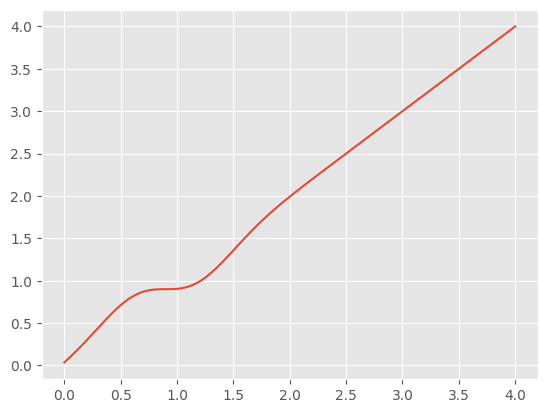

In [52]:
print("\nPunto fijo\nCalculo g admisible:")
def g_3(x):
    return x - f_3(x)

# Compruebo que g(x) es admisible con un gráfico
x = np.linspace(a, b+1, 100)
y = [g_3(i) for i in x]
plt.plot(x, y)
plt.show()

In [53]:
resultados = punto_fijo(g_3, a, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados del punto fijo:
Primeras 5 iteraciones:


,p
0,0.000000
1,0.035248
2,0.078682
3,0.133976
4,0.207238


Últimas 5 iteraciones:


,p
7,0.656435
8,0.848549
9,0.899458
10,0.900000
11,0.900000


Raíz obtenida:  0.9


##### Secante

In [54]:
resultados = secante(f_3, a, b, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados de la secante:
Primeras 5 iteraciones:


,p
0,0.000000
1,3.000000
2,2.999996


Últimas 5 iteraciones:


,p
0,0.000000
1,3.000000
2,2.999996


Raíz obtenida:  3.0


In [55]:
print("Por la forma de la función, la secante diverge. Para evitar esto, vamos a hacer unos pasos de bisección para encontrar un mejor intervalo inicial.")
resultados = biseccion(f_3, a, b, tol=1e-1)
a_ = resultados[-1]
b_ = resultados[-2]

print("Intervalo: [", a_, ", ", b_, "]")

resultados = secante(f_3, a_, b_, tol, True)

Por la forma de la función, la secante diverge. Para evitar esto, vamos a hacer unos pasos de bisección para encontrar un mejor intervalo inicial.
Intervalo: [ 0.84375 ,  0.9375 ]
Resultados de la secante:
Primeras 5 iteraciones:


,p
0,0.843750
1,0.937500
2,0.899842
3,0.900001
4,0.900000


Últimas 5 iteraciones:


,p
0,0.843750
1,0.937500
2,0.899842
3,0.900001
4,0.900000


##### Newton-Raphson

In [56]:
p_0 = 0.5
# Calculo la derivada de f_3
def df_3(x):
    return -8*(x - 0.9)**2* math.e**(-4*(x - 0.9)**2) + math.e**(-4*(x - 0.9)**2)

In [57]:
try:
    resultados = newton_raphson(f_3, df_3, p_0, tol, True)
except:
    print("Newton Raphson no converge con la semilla dada. Vamos a probar obtener una semilla más cercana con el metodo de beseción")
    resultados = biseccion(f_3, a, b, tol=1e-1)
    p_0 = round(resultados[-1], 1)
    print("Semilla obtenida: ", p_0)

    resultados = newton_raphson(f_3, df_3, p_0, tol, True)
finally:
    print("Raíz obtenida: ", round(resultados[-1], 5))

Newton Raphson no converge con la semilla dada. Vamos a probar obtener una semilla más cercana con el metodo de beseción
Semilla obtenida:  0.8
Resultados de Newton-Raphson:
Primeras 5 iteraciones:


,p
0,0.800000
1,0.908696
2,0.899995
3,0.900000


Últimas 5 iteraciones:


,p
0,0.800000
1,0.908696
2,0.899995
3,0.900000


Raíz obtenida:  0.9


##### Newton-Raphson Modificado

In [58]:
def d2f_3(x):
    #return ((8000*x**3-21600*x**2+16440*x-3132)* math.e**(-4*(x-9/10)**2))/125
    return (64*x**3 - 172.8*x**2 + 131.52*x - 25.056)* math.e**(-4*(x-9/10)**2)

In [59]:
resultados = newton_raphson_modificado(f_3, df_3, d2f_3, p_0, tol, True)
print("Raíz obtenida: ", round(resultados[-1], 5))

Resultados de Newton-Raphson modificado:
Primeras 5 iteraciones:


,p
0,0.800000
1,0.885185
2,0.899948
3,0.900000
4,0.900000


Últimas 5 iteraciones:


,p
0,0.800000
1,0.885185
2,0.899948
3,0.900000
4,0.900000


Raíz obtenida:  0.9


#### Con tolerancia 1 · 10<sup>-13</sup>.

In [60]:
tol = 1e-13

##### Bisección

In [61]:
resultados = biseccion(f_3, a, b, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de la bisección:
Primeras 5 iteraciones:


,p
0,0.0000
1,1.5000
2,0.7500
3,1.1250
4,0.9375


Últimas 5 iteraciones:


,p
41,0.9
42,0.9
43,0.9
44,0.9
45,0.9


Raíz obtenida:  0.8999999999999488


##### Punto Fijo

In [62]:
resultados = punto_fijo(g_3, a, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados del punto fijo:
Primeras 5 iteraciones:


,p
0,0.000000
1,0.035248
2,0.078682
3,0.133976
4,0.207238


Últimas 5 iteraciones:


,p
8,0.848549
9,0.899458
10,0.900000
11,0.900000
12,0.900000


Raíz obtenida:  0.9


##### Secante

In [63]:
resultados = secante(f_3, a_, b_, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de la secante:
Primeras 5 iteraciones:


,p
0,0.843750
1,0.937500
2,0.899842
3,0.900001
4,0.900000


Últimas 5 iteraciones:


,p
1,0.937500
2,0.899842
3,0.900001
4,0.900000
5,0.900000


Raíz obtenida:  0.9


##### Newton-Raphson

In [64]:
resultados = newton_raphson(f_3, df_3, p_0, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de Newton-Raphson:
Primeras 5 iteraciones:


,p
0,0.800000
1,0.908696
2,0.899995
3,0.900000
4,0.900000


Últimas 5 iteraciones:


,p
0,0.800000
1,0.908696
2,0.899995
3,0.900000
4,0.900000


Raíz obtenida:  0.9


##### Newton-Raphson Modificado

In [65]:
resultados = newton_raphson_modificado(f_3, df_3, d2f_3, p_0, tol, True)
print("Raíz obtenida: ", resultados[-1])

Resultados de Newton-Raphson modificado:
Primeras 5 iteraciones:


,p
0,0.800000
1,0.885185
2,0.899948
3,0.900000
4,0.900000


Últimas 5 iteraciones:


,p
1,0.885185
2,0.899948
3,0.900000
4,0.900000
5,0.900000


Raíz obtenida:  0.9


## c. Halle la raíz mediante la función de búsqueda de raíces de un lenguaje o paquete orientado a cálculo numérico (e.g. Python+SciPy: scipy.optimize.brentq). Al resultado obtenido le vamos a asignar como "xReal".

In [66]:
x1_real = optimize.brentq(f_1,0,3)
x2_real = optimize.brentq(f_2,0,3)
x3_real = optimize.brentq(f_3,0,3)

print(x1_real,x2_real,x3_real)

2.668401648721945 0.804988539348394 0.8999999999998904


## d. Compare los resultados obtenidos para los distintos métodos y cotas de error, grafique para todos los casos:

<ul>
    <li>Orden de convergencia P vs iteraciones</li>
    <li>Constante asintótica λ vs iteraciones</li>
    <li>log<sub>10</sub>(/∆x/) vs iteraciones</li>
    <li>log<sub>10</sub>(/x<sub>Candidata</sub> - x<sub>Real</sub>/) vs iteraciones</li>
</ul>
        Discuta ventajas y desventajas. ¿Son las que esperaba en base a la teoría?

### Definimos funciones para los gráficos:

Una definición del orden de convergencia se expresa con el siguiente límite:
\begin{equation}
\lim_{x \rightarrow \infty} \dfrac{|x_{n+1}-r|}{|x_n-r|^{\alpha}} = \lambda
\end{equation}

Con $\alpha$ el orden de convergencia y $\lambda$ la constante asintotica, que determina la tasa de convergencia del método.

Los tipos de convergencia que pueden tener los métodos utilizados:

<ul>
      <li>Convergencia lineal: α = 1 </li>
      <li>Convergencia cuadratica: α = 2 </li>
      <li>Convergencia supra lineal: α < 2 </li>
</ul>

La constante asintotica suele tomar valores menores a 1 en caso de que el método converga a la raiz, y valores mayores a 1 si el método diverge, y esto puede ocurrir debido a una mala elección del intervalo,o la cantidad de iteraciones no es suficiente para determinar de manera correcta la constante, o también por caracteristicas particulares de cada función.

In [67]:
def calcular_orden_de_convergencia(iteraciones,tol):
    resultados_orden_de_convergencia = []
    for i in range(0,len(iteraciones)):
        if(i<3):
            resultados_orden_de_convergencia.append(0)
        else:
            error_nMas1 = abs(iteraciones[i] - iteraciones[i-1])
            error_n = abs(iteraciones[i-1] - iteraciones [i-2])
            error_nMenos1 = abs(iteraciones[i-2] - iteraciones [i-3])
        
            if error_nMas1 > tol and error_n > tol and error_nMenos1 > tol:
                logNumerador = abs(np.log(error_nMas1/error_n))
                logDenominador = abs(np.log(error_n/error_nMenos1))
                orden_convergencia = logNumerador/logDenominador
                resultados_orden_de_convergencia.append(orden_convergencia)
            else:
                resultados_orden_de_convergencia.append(resultados_orden_de_convergencia[-1])

    return resultados_orden_de_convergencia

def calcular_constante_asintotica(iteraciones,orden_convergencia):
    constantes_asintoticas = []
    for i in range(0,len(iteraciones)-1):
        if i < 2:
            constantes_asintoticas.append(0)
        else:
            error_nMas1 = abs(iteraciones[i] - iteraciones[i-1])
            error_n = abs(iteraciones[i-1] - iteraciones[i-2])
            constante = error_nMas1 / (error_n**orden_convergencia)
            constantes_asintoticas.append(constante)
    return constantes_asintoticas



def error_con_resultado_real(iteraciones,x_real):
    diferencias = []
    for i in range(0,len(iteraciones)-1):
        if iteraciones[i] - x_real == 0:
            diferencias.append(-15)
        else:
            diferencias.append(np.log10(abs(iteraciones[i]-x_real)))
    return diferencias



def error_por_iteracion(iteraciones):
    errores = []

    for i in range(0,len(iteraciones)-1):
        if i < 1:
            errores.append(0)
        else:
            error = abs(iteraciones[i] - iteraciones[i-1])
            errores.append(np.log10(error))

    return errores


In [68]:
calcular_orden_de_convergencia(secante(f_1, a, b, 1e-13),1e-13)

[0,
 0,
 0,
 0.4986469158707571,
 2.7656682904356495,
 0.9499351908789267,
 2.2741473346856744,
 1.380143710226394,
 1.7182992851909475,
 1.7182992851909475]

### Graficos

In [69]:
tol = 1e-13

#### Graficos de f_1

##### Órden de convergencia

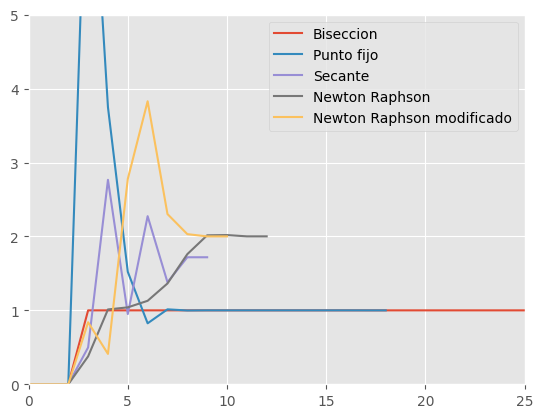

In [70]:
convergencias = {
    "Biseccion": calcular_orden_de_convergencia(biseccion(f_1, a, b, tol),tol),
    "Punto fijo": calcular_orden_de_convergencia(punto_fijo(g_1, a, tol),tol),
    "Secante": calcular_orden_de_convergencia(secante(f_1, a, b, tol),tol),
    "Newton Raphson": calcular_orden_de_convergencia(newton_raphson(f_1, df_1, 0.5, tol),tol),
    "Newton Raphson modificado": calcular_orden_de_convergencia(newton_raphson_modificado(f_1, df_1, d2f_1, 0.5, tol),tol),
}

for convergencia in convergencias:
    plt.plot(convergencias[convergencia], label=convergencia)
plt.ylim(0, 5)
plt.xlim(0,25)
plt.legend()
plt.show()

##### Constantes Asintóticas

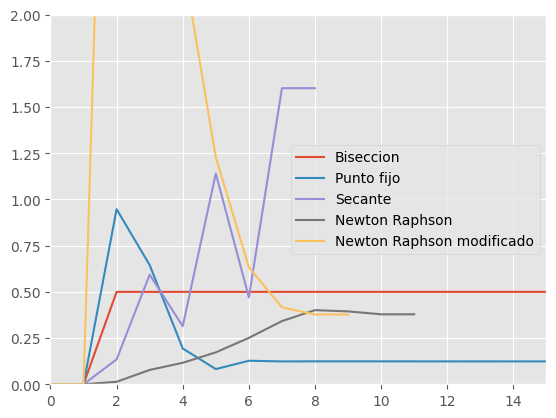

In [71]:
constantes = {
    "Biseccion": calcular_constante_asintotica(biseccion(f_1, a, b, tol),convergencias["Biseccion"][-1]),
    "Punto fijo": calcular_constante_asintotica(punto_fijo(g_1, a, tol),convergencias["Punto fijo"][-1]),
    "Secante": calcular_constante_asintotica(secante(f_1, a, b, tol),convergencias["Secante"][-1]),
    "Newton Raphson": calcular_constante_asintotica(newton_raphson(f_1, df_1, 0.5, tol),convergencias["Newton Raphson"][-1]),
    "Newton Raphson modificado": calcular_constante_asintotica(newton_raphson_modificado(f_1, df_1, d2f_1, 0.5, tol),convergencias["Newton Raphson modificado"][-1]),
}

for constante in constantes:
    plt.plot(constantes[constante], label=constante)
plt.ylim(0, 2)
plt.xlim(0, 15)
plt.legend()
plt.show()

##### Errores con Resultado Real

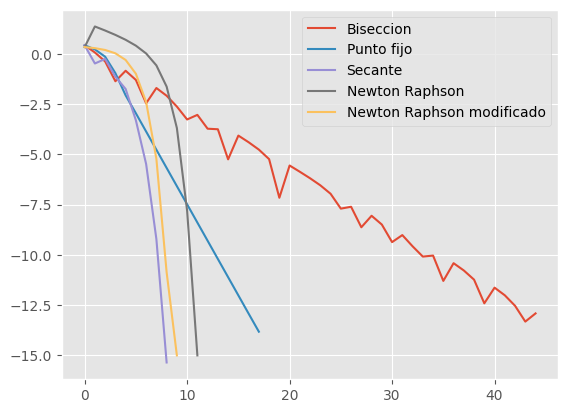

In [72]:
errores_real = {
    "Biseccion": error_con_resultado_real(biseccion(f_1, a, b, tol),x1_real),
    "Punto fijo": error_con_resultado_real(punto_fijo(g_1, a, tol),x1_real),
    "Secante": error_con_resultado_real(secante(f_1, a, b, tol),x1_real),
    "Newton Raphson": error_con_resultado_real(newton_raphson(f_1, df_1, 0.5, tol),x1_real),
    "Newton Raphson modificado": error_con_resultado_real(newton_raphson_modificado(f_1, df_1, d2f_1, 0.5, tol),x1_real),
}

for error in errores_real:
    plt.plot(errores_real[error], label=error)
plt.legend()
plt.show()

##### Errores por iteración

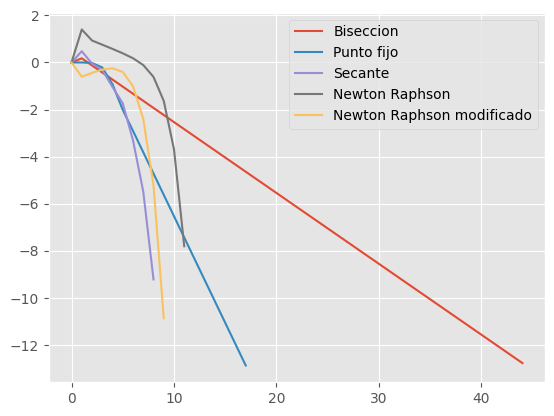

In [73]:
errores_iteracion = {
    "Biseccion": error_por_iteracion(biseccion(f_1, a, b, tol)),
    "Punto fijo": error_por_iteracion(punto_fijo(g_1, a, tol)),
    "Secante": error_por_iteracion(secante(f_1, a, b, tol)),
    "Newton Raphson": error_por_iteracion(newton_raphson(f_1, df_1, 0.5, tol)),
    "Newton Raphson modificado": error_por_iteracion(newton_raphson_modificado(f_1, df_1, d2f_1, 0.5, tol)),
}

for error in errores_iteracion:
    plt.plot(errores_iteracion[error], label=error)
plt.legend()
plt.show()

#### Gráficos de f_2

##### Órden de convergencia

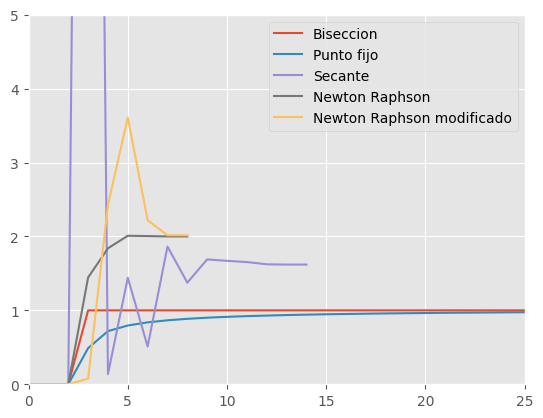

In [74]:
convergencias = {
    "Biseccion": calcular_orden_de_convergencia(biseccion(f_2, a, b, tol),tol),
    "Punto fijo": calcular_orden_de_convergencia(punto_fijo(g_2, a, tol),tol),
    "Secante": calcular_orden_de_convergencia(secante(f_2, a, b, tol),tol),
    "Newton Raphson": calcular_orden_de_convergencia(newton_raphson(f_2, df_2, 0.5, tol),tol),
    "Newton Raphson modificado": calcular_orden_de_convergencia(newton_raphson_modificado(f_2, df_2, d2f_2, 0.5, tol),tol),
}

for convergencia in convergencias:
    plt.plot(convergencias[convergencia], label=convergencia)
plt.ylim(0,5)
plt.xlim(0,25)
plt.legend()
plt.show()

##### Constante Asintotica

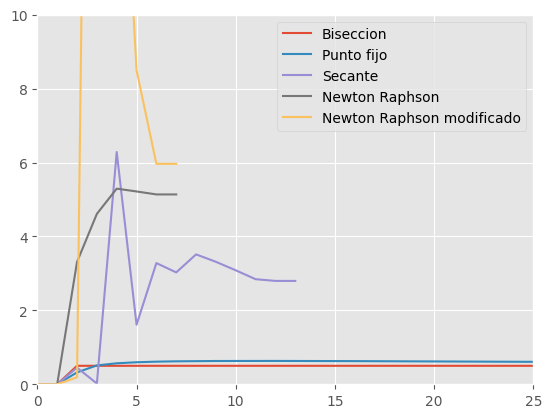

In [75]:
constantes = {
    "Biseccion": calcular_constante_asintotica(biseccion(f_2, a, b, tol),convergencias["Biseccion"][-1]),
    "Punto fijo": calcular_constante_asintotica(punto_fijo(g_2, a, tol),convergencias["Punto fijo"][-1]),
    "Secante": calcular_constante_asintotica(secante(f_2, a, b, tol),convergencias["Secante"][-1]),
    "Newton Raphson": calcular_constante_asintotica(newton_raphson(f_2, df_2, 0.5, tol),convergencias["Newton Raphson"][-1]),
    "Newton Raphson modificado": calcular_constante_asintotica(newton_raphson_modificado(f_2, df_2, d2f_2, 0.5, tol),convergencias["Newton Raphson modificado"][-1]),
}

for constante in constantes:
    plt.plot(constantes[constante], label=constante)
plt.ylim(0,10)
plt.xlim(0,25)
plt.legend()
plt.show()

##### Errores con Resultado Real

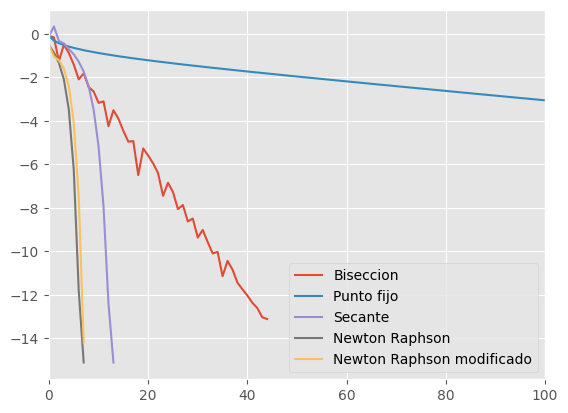

In [76]:
errores_real = {
    "Biseccion": error_con_resultado_real(biseccion(f_2, a, b, tol),x2_real),
    "Punto fijo": error_con_resultado_real(punto_fijo(g_2, a, tol),x2_real),
    "Secante": error_con_resultado_real(secante(f_2, a, b, tol),x2_real),
    "Newton Raphson": error_con_resultado_real(newton_raphson(f_2, df_2, 0.5, tol),x2_real),
    "Newton Raphson modificado": error_con_resultado_real(newton_raphson_modificado(f_2, df_2, d2f_2, 0.5, tol),x2_real),
}

for error in errores_real:
    plt.plot(errores_real[error], label=error)
plt.xlim(0,100)
plt.legend()
plt.show()

##### Errores por iteración

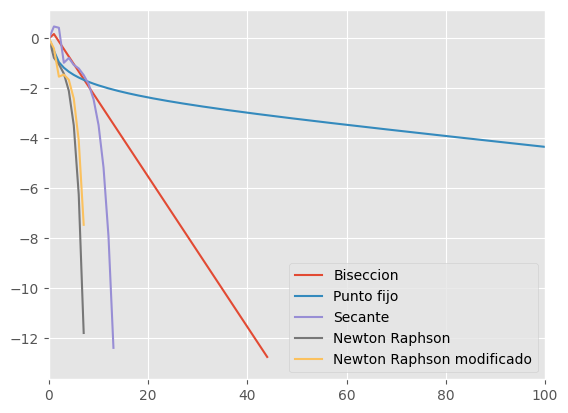

In [77]:
errores_iteracion = {
    "Biseccion": error_por_iteracion(biseccion(f_2, a, b, tol)),
    "Punto fijo": error_por_iteracion(punto_fijo(g_2, a, tol)),
    "Secante": error_por_iteracion(secante(f_2, a, b, tol)),
    "Newton Raphson": error_por_iteracion(newton_raphson(f_2, df_2, 0.5, tol)),
    "Newton Raphson modificado": error_por_iteracion(newton_raphson_modificado(f_2, df_2, d2f_2, 0.5, tol)),
}

for error in errores_iteracion:
    plt.plot(errores_iteracion[error], label=error)
plt.xlim(0,100)
plt.legend()
plt.show()

#### Gráficos para f_3

##### Órden de convergencia

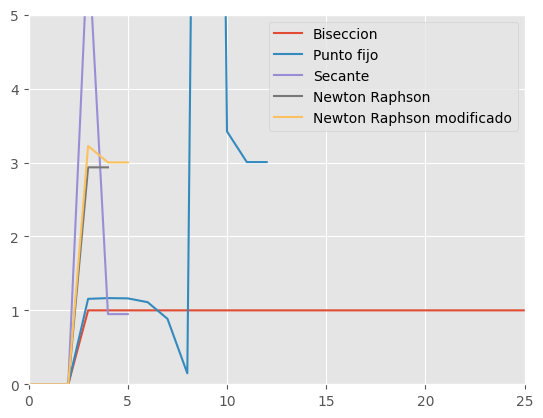

In [78]:
convergencias = {
    "Biseccion": calcular_orden_de_convergencia(biseccion(f_3, a, b, tol),tol),
    "Punto fijo": calcular_orden_de_convergencia(punto_fijo(g_3, a, tol),tol),
    "Secante": calcular_orden_de_convergencia(secante(f_3, a_, b_, tol),tol),
    "Newton Raphson": calcular_orden_de_convergencia(newton_raphson(f_3, df_3, p_0, tol),tol),
    "Newton Raphson modificado": calcular_orden_de_convergencia(newton_raphson_modificado(f_3, df_3, d2f_3, p_0, tol),tol),
}

for convergencia in convergencias:
    plt.plot(convergencias[convergencia], label=convergencia)
plt.ylim(0,5)
plt.xlim(0,25)
plt.legend()
plt.show()

##### Constante asintótica

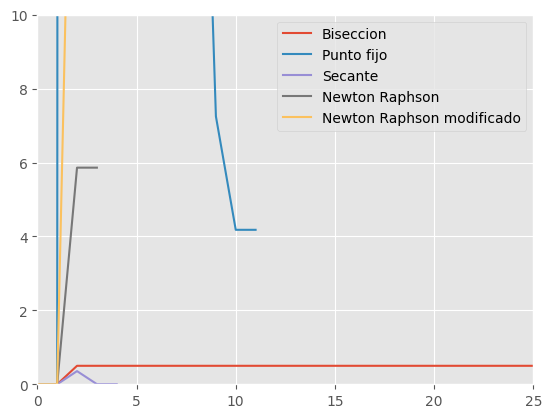

In [79]:
constantes = {
    "Biseccion": calcular_constante_asintotica(biseccion(f_3, a, b, tol),convergencias["Biseccion"][-1]),
    "Punto fijo": calcular_constante_asintotica(punto_fijo(g_3, a, tol),convergencias["Punto fijo"][-1]),
    "Secante": calcular_constante_asintotica(secante(f_3, a_, b_, tol),convergencias["Secante"][-1]),
    "Newton Raphson": calcular_constante_asintotica(newton_raphson(f_3, df_3, p_0, tol),convergencias["Newton Raphson"][-1]),
    "Newton Raphson modificado": calcular_constante_asintotica(newton_raphson_modificado(f_3, df_3, d2f_3, p_0, tol),convergencias["Newton Raphson modificado"][-1]),
}

for constante in constantes:
    plt.plot(constantes[constante], label=constante)
plt.ylim(0,10)
plt.xlim(0,25)
plt.legend()
plt.show()

##### Errores con Resultado Real

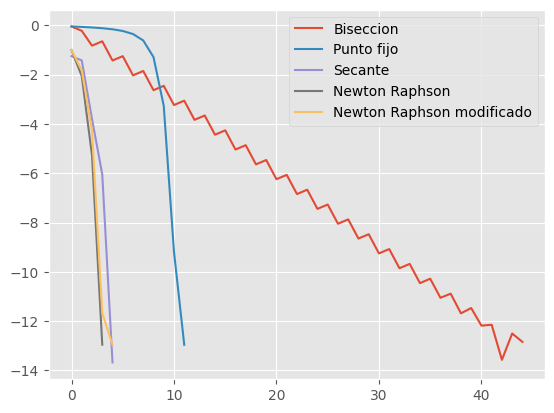

In [80]:
errores_real = {
    "Biseccion": error_con_resultado_real(biseccion(f_3, a, b, tol),x3_real),
    "Punto fijo": error_con_resultado_real(punto_fijo(g_3, a, tol),x3_real),
    "Secante": error_con_resultado_real(secante(f_3, a_, b_, tol),x3_real),
    "Newton Raphson": error_con_resultado_real(newton_raphson(f_3, df_3, p_0, tol),x3_real),
    "Newton Raphson modificado": error_con_resultado_real(newton_raphson_modificado(f_3, df_3, d2f_3, p_0, tol),x3_real),
}

for error in errores_real:
    plt.plot(errores_real[error], label=error)
plt.legend()
plt.show()

##### Errores por iteración

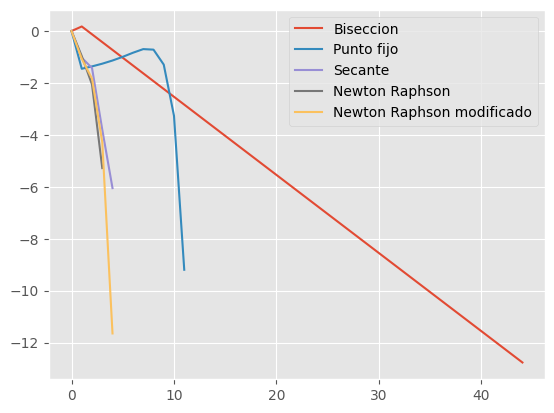

In [81]:
errores_iteracion = {
    "Biseccion": error_por_iteracion(biseccion(f_3, a, b, tol)),
    "Punto fijo": error_por_iteracion(punto_fijo(g_3, a, tol)),
    "Secante": error_por_iteracion(secante(f_3, a_, b_, tol)),
    "Newton Raphson": error_por_iteracion(newton_raphson(f_3, df_3, p_0, tol)),
    "Newton Raphson modificado": error_por_iteracion(newton_raphson_modificado(f_3, df_3, d2f_3, p_0, tol)),
}

for error in errores_iteracion:
    plt.plot(errores_iteracion[error], label=error)
plt.legend()
plt.show()

Observamos que obtenemos valores inusuales para la constante asintótica, creemos que se debe a que algunos de los métodos, a pesar de estar convergiendo, a veces tienen diferencias muy pequeñas entre iteraciones. 

### Conclusiones

Analizando los resultados, podemos observar que los métodos mas efectivos son Newton-Raphson y Newton-Raphson modificado, ya que necesitan muchas menos iteraciones que los otros métodos para llegar a la raiz, pero estos dependen en gran parte de la semilla elegida, que en caso de no ser tan próxima a la raiz buscada puede llevar a que el método diverga. Además, estos métodos presentan convergencia cuadrática, frente a otros como bisección que tiene convergencia lineal,por lo que requiere de muchas iteraciones, pero este último resulta muy util para determinar la semilla en otros métodos. Tambien vemos convergencia lineal en el caso de punto fijo, pero este varia según la g(x) elegida, la cual encontramos muy costosa de encontrar para justificar la utilización del método. Por último, el método de la secante requiere de mas valores de la función para llegar a la raiz, y en ciertos caso puede no coverger.

Considerando las ventajas de la rapidez de Newton Raphson y su versión modificada, con la rápidez de obtener una muy buena semilla con bisección es una metodología muy eficiente y no muy costosa.  